[View in Colaboratory](https://colab.research.google.com/github/AvijitGhosh82/Finance_Graph_Theory/blob/master/GrowthModels.ipynb)

**Remember to make github private after every coding session**

# Dataset Cleaning

In [60]:
! rm -rf  Finance_Graph_Theory
! git clone https://github.com/AvijitGhosh82/Finance_Graph_Theory

Cloning into 'Finance_Graph_Theory'...
remote: Counting objects: 167, done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 167 (delta 2), reused 15 (delta 0), pack-reused 144
Receiving objects: 100% (167/167), 138.79 MiB | 58.15 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [61]:
import pandas as pd
df = pd.read_csv('Finance_Graph_Theory/Country.csv')
df.dtypes

Country    object
AUS         int64
AUS.1       int64
AUS.2       int64
AUS.3       int64
AUS.4       int64
AUS.5       int64
AUS.6       int64
AUS.7       int64
AUS.8       int64
AUS.9       int64
AUS.10      int64
AUS.11      int64
AUS.12      int64
AUS.13      int64
AUS.14      int64
AUS.15      int64
AUS.16      int64
AUS.17      int64
AUS.18      int64
AUS.19      int64
AUS.20      int64
AUS.21      int64
AUS.22      int64
AUS.23      int64
AUS.24      int64
AUS.25      int64
AUS.26      int64
AUS.27      int64
AUS.28      int64
            ...  
ROW.26      int64
ROW.27      int64
ROW.28      int64
ROW.29      int64
ROW.30      int64
ROW.31      int64
ROW.32      int64
ROW.33      int64
ROW.34      int64
ROW.35      int64
ROW.36      int64
ROW.37      int64
ROW.38      int64
ROW.39      int64
ROW.40      int64
ROW.41      int64
ROW.42      int64
ROW.43      int64
ROW.44      int64
ROW.45      int64
ROW.46      int64
ROW.47      int64
ROW.48      int64
ROW.49      int64
ROW.50    

In [62]:
df = df.groupby(['Country']).sum()
df.head(5)


,AUS,AUS.1,AUS.2,AUS.3,AUS.4,AUS.5,AUS.6,AUS.7,AUS.8,AUS.9,...,ROW.46,ROW.47,ROW.48,ROW.49,ROW.50,ROW.51,ROW.52,ROW.53,ROW.54,ROW.55
Country,,,,,,,,,,,,,,,,,,,,,
AUS,22743,983,736,45918,44552,2679,5094,3962,3062,13648,...,194,0,173,190,1428,1172,580,533,0,0
AUT,9,0,0,23,11,3,1,4,3,1,...,90,0,87,103,561,336,327,247,0,0
BEL,20,0,0,33,18,3,2,8,5,2,...,135,0,168,205,947,549,637,489,0,0
BGR,0,0,0,0,0,0,0,0,0,0,...,10,0,16,22,117,62,87,54,0,0
BRA,17,0,0,11,52,6,1,4,4,3,...,80,0,149,166,774,488,521,548,0,0


In [63]:
df_trans = df.T
# df_trans.index.names = ['index']
df_trans.to_csv('temp.csv')
df_trans = pd.read_csv('temp.csv')
df_trans.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
df_trans['Country'] = df_trans['Country'].astype(str).str[:3]
df_trans = df_trans.groupby(['Country']).sum()
df_trans.to_csv('Countrytrans.csv')
df_trans.head()

,AUS,AUT,BEL,BGR,BRA,CAN,CHE,CHN,CYP,CZE,...,PRT,ROU,ROW,RUS,SVK,SVN,SWE,TUR,TWN,USA
Country,,,,,,,,,,,,,,,,,,,,,
AUS,904769,353,479,1,405,931,979,11328,0,72,...,28,5,48076,320,6,7,776,191,1766,10805
AUT,28,265580,1524,227,120,168,3440,1169,28,3874,...,134,838,7235,2029,2080,1009,942,580,242,2009
BEL,317,1351,337154,704,1565,991,3641,5304,65,1686,...,573,459,19054,1891,296,209,2839,1246,310,11299
BGR,0,379,99,45958,79,47,46,177,37,166,...,9,576,2759,3100,46,29,33,1048,33,158
BRA,1031,741,937,23,1182689,1043,1091,7430,0,192,...,390,25,49164,774,17,10,691,654,3057,15201


# Growth Models

In [0]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections
import scipy.cluster.vq as vq
import numpy.linalg as la # For finding eigenvalues and eigenvectors
import itertools
from networkx.algorithms.community.centrality import girvan_newman
import pandas as pd
import io
import math

In [65]:
data = pd.read_csv('Countrytrans.csv',delimiter=',') 
countries = data.columns.tolist()[1:]
data = np.matrix(data)
data = np.delete(data, 0, 1)
data = np.array(data)

# print (countries)

rows, columns = np.shape(data)
n = rows
print (n)

44


In [0]:
def create_graph(g):
    node_size = []
    for i in range(len(countries)):
        node_size.append(data[i][i])
        g.add_node(countries[i], node_size = data[i][i])

    for i in range(len(countries)):
        for j in range(len(countries)):
            if i == j or data[i][j]==0:
                pass
            else:
                g.add_weighted_edges_from([(countries[i],countries[j],data[i][j] * 1)])
    return node_size
  

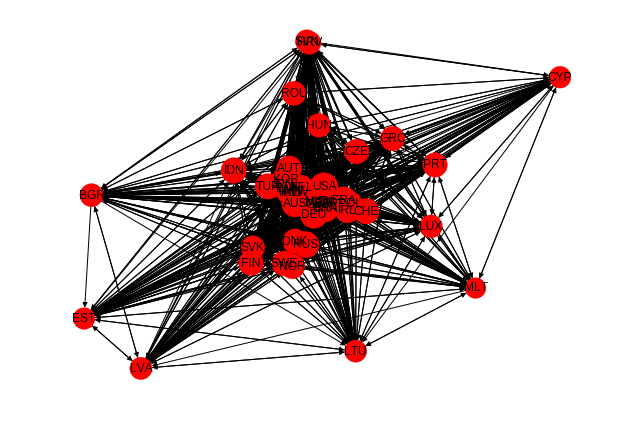

In [67]:
g = nx.MultiDiGraph()
node_size = create_graph(g)
pos = nx.spring_layout(g)
nx.draw(g,pos, with_labels=True,node_color = "red", node_list="header", node_size=[math.log(v)*50 for v in node_size])
plt.show()

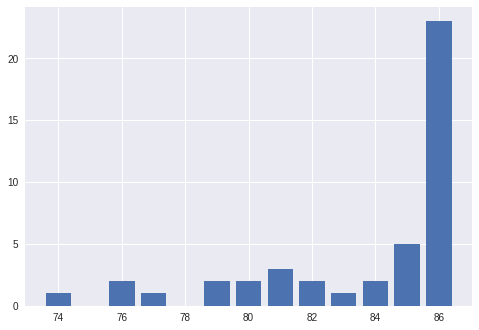

(86, 85, 84, 83, 82, 81, 80, 79, 77, 76, 74) (23, 5, 2, 1, 2, 3, 2, 2, 1, 2, 1)


In [68]:
# Calculate degree distribution histogram
#degree_sequence = sorted(nx.degree(g).values(),reverse=True) # degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt)#, width=0.80, color='b')
#plt.scatter(deg,cnt)

# PLot both graphs together
#plt.axes([0.4, 0.4, 0.5, 0.5])  
#nx.draw(g,pos,node_size = 100)
plt.show()
print (deg,cnt)

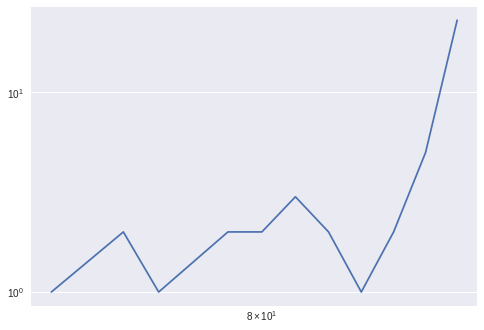

In [69]:
plt.loglog(deg,cnt)

In [111]:
r=nx.degree_assortativity_coefficient(g)
print ("Assortavity  :" + str(r))

# #Calculate clustering
# clustering = nx.average_clustering(g)
# print("Clustering :" + str(clustering))

# Calculate density
density = nx.density(g)
print ("Density :" + str(density))


Assortavity  :-0.08865177759337561
Density :0.9730443974630021


In [0]:
import networkx as nx
import numpy as np
from scipy import integrate


def disparity_filter(G, weight='weight'):
    ''' Compute significance scores (alpha) for weighted edges in G as defined in Serrano et al. 2009
        Args
            G: Weighted NetworkX graph
        Returns
            Weighted graph with a significance score (alpha) assigned to each edge
        References
            M. A. Serrano et al. (2009) Extracting the Multiscale backbone of complex weighted networks. PNAS, 106:16, pp. 6483-6488.
    '''
    
    if nx.is_directed(G): #directed case    
        N = nx.DiGraph()
        for u in G:
            
            k_out = G.out_degree(u)
            k_in = G.in_degree(u)
            
            if k_out > 1:
                sum_w_out = sum(np.absolute(G[u][v][0][weight]) for v in G.successors(u))
                for v in G.successors(u):
                    w = G[u][v][0][weight]
                    p_ij_out = float(np.absolute(w))/sum_w_out
                    alpha_ij_out = 1 - (k_out-1) * integrate.quad(lambda x: (1-x)**(k_out-2), 0, p_ij_out)[0]
                    N.add_edge(u, v, weight = w, alpha_out=float('%.4f' % alpha_ij_out))
                    
            elif k_out == 1 and G.in_degree(G.successors(u)[0]) == 1:
                #we need to keep the connection as it is the only way to maintain the connectivity of the network
                v = G.successors(u)[0]
                w = G[u][v][weight]
                N.add_edge(u, v, weight = w, alpha_out=0., alpha_in=0.)
                #there is no need to do the same for the k_in, since the link is built already from the tail
            
            if k_in > 1:
                sum_w_in = sum(np.absolute(G[v][u][0][weight]) for v in G.predecessors(u))
                for v in G.predecessors(u):
                    w = G[v][u][0][weight]
                    p_ij_in = float(np.absolute(w))/sum_w_in
                    alpha_ij_in = 1 - (k_in-1) * integrate.quad(lambda x: (1-x)**(k_in-2), 0, p_ij_in)[0]
                    N.add_edge(v, u, weight = w, alpha_in=float('%.4f' % alpha_ij_in))
        return N
    
    else: #undirected case
        B = nx.Graph()
        for u in G:
            k = len(G[u])
            if k > 1:
                sum_w = sum(np.absolute(G[u][v][weight]) for v in G[u])
                for v in G[u]:
                    w = G[u][v][weight]
                    p_ij = float(np.absolute(w))/sum_w
                    alpha_ij = 1 - (k-1) * integrate.quad(lambda x: (1-x)**(k-2), 0, p_ij)[0]
                    B.add_edge(u, v, weight = w, alpha=float('%.4f' % alpha_ij))
        return B

def disparity_filter_alpha_cut(G,weight='weight',alpha_t=0.4, cut_mode='or'):
    ''' Performs a cut of the graph previously filtered through the disparity_filter function.
        
        Args
        ----
        G: Weighted NetworkX graph
        
        weight: string (default='weight')
            Key for edge data used as the edge weight w_ij.
            
        alpha_t: double (default='0.4')
            The threshold for the alpha parameter that is used to select the surviving edges.
            It has to be a number between 0 and 1.
            
        cut_mode: string (default='or')
            Possible strings: 'or', 'and'.
            It works only for directed graphs. It represents the logic operation to filter out edges
            that do not pass the threshold value, combining the alpha_in and alpha_out attributes
            resulting from the disparity_filter function.
            
            
        Returns
        -------
        B: Weighted NetworkX graph
            The resulting graph contains only edges that survived from the filtering with the alpha_t threshold
    
        References
        ---------
        .. M. A. Serrano et al. (2009) Extracting the Multiscale backbone of complex weighted networks. PNAS, 106:16, pp. 6483-6488.
    '''    
    
    
    if nx.is_directed(G):#Directed case:   
        B = nx.DiGraph()
        for u, v, w in G.edges(data=True):
            try:
                alpha_in =  w['alpha_in']
            except KeyError: #there is no alpha_in, so we assign 1. It will never pass the cut
                alpha_in = 1
            try:
                alpha_out =  w['alpha_out']
            except KeyError: #there is no alpha_out, so we assign 1. It will never pass the cut
                alpha_out = 1  
            
            if cut_mode == 'or':
                if alpha_in<alpha_t or alpha_out<alpha_t:
                    B.add_edge(u,v, weight=w[weight])
            elif cut_mode == 'and':
                if alpha_in<alpha_t and alpha_out<alpha_t:
                    B.add_edge(u,v, weight=w[weight])
        return B

    else:
        B = nx.Graph()#Undirected case:   
        for u, v, w in G.edges(data=True):
            
            try:
                alpha = w['alpha']
            except KeyError: #there is no alpha, so we assign 1. It will never pass the cut
                alpha = 1
                
            if alpha<alpha_t:
                B.add_edge(u,v, weight=w[weight])
        return B   

In [107]:
alpha = 0.05
G1 = disparity_filter(g)
G2 = nx.Graph([(u, v, d) for u, v, d in G1.edges(data=True) if ((d['alpha_in'] < alpha) or (d['alpha_out'] < alpha))])
print ('alpha = %s' % alpha)
print ('original: nodes = %s, edges = %s' % (G1.number_of_nodes(), G1.number_of_edges()))
print ('backbone: nodes = %s, edges = %s' % (G2.number_of_nodes(), G2.number_of_edges()))
print (G2.edges(data=True))

alpha = 0.05
original: nodes = 44, edges = 1841
backbone: nodes = 44, edges = 165
[('AUS', 'CHN', {'weight': 33353, 'alpha_out': 0.1381, 'alpha_in': 0.0002}), ('AUS', 'ROW', {'weight': 42485, 'alpha_out': 0.3877, 'alpha_in': 0.0}), ('AUS', 'USA', {'weight': 10805, 'alpha_out': 0.0116, 'alpha_in': 0.591}), ('AUS', 'IND', {'weight': 19018, 'alpha_in': 0.0104, 'alpha_out': 0.0168}), ('AUS', 'JPN', {'weight': 28457, 'alpha_in': 0.0009, 'alpha_out': 0.0438}), ('CHN', 'BRA', {'weight': 19782, 'alpha_in': 0.0008, 'alpha_out': 0.3125}), ('CHN', 'IDN', {'weight': 8080, 'alpha_out': 0.0138, 'alpha_in': 0.5499}), ('CHN', 'IND', {'weight': 12119, 'alpha_out': 0.4923, 'alpha_in': 0.0215}), ('CHN', 'JPN', {'weight': 37730, 'alpha_out': 0.015, 'alpha_in': 0.0568}), ('CHN', 'KOR', {'weight': 32487, 'alpha_out': 0.0036, 'alpha_in': 0.0856}), ('CHN', 'ROW', {'weight': 254606, 'alpha_out': 0.0024, 'alpha_in': 0.0}), ('CHN', 'TWN', {'weight': 13187, 'alpha_out': 0.0302, 'alpha_in': 0.3752}), ('CHN', 'FIN'

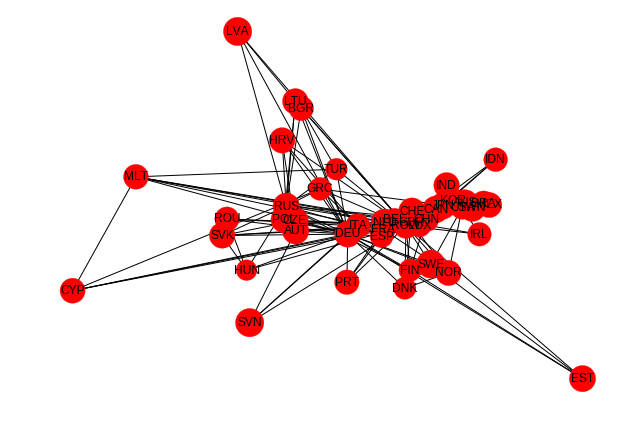

In [110]:
pos1 = nx.spring_layout(G2)
nx.draw(G2,pos1, with_labels=True,node_color = "red", node_list="header", node_size=[math.log(v)*50 for v in node_size], arrows = True)
plt.show()

In [112]:
r=nx.degree_assortativity_coefficient(G2)
print ("Assortavity  :" + str(r))

# #Calculate clustering
# clustering = nx.average_clustering(g)
# print("Clustering :" + str(clustering))

# Calculate density
density = nx.density(G2)
print ("Density :" + str(density))

Assortavity  :-0.37932882535249246
Density :0.1744186046511628


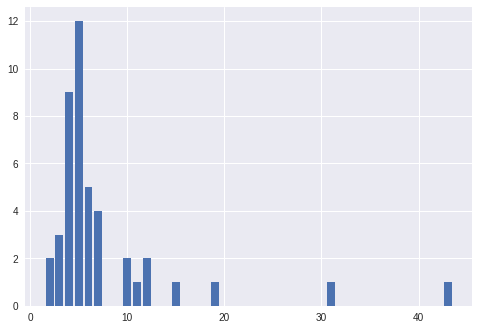

(43, 31, 19, 15, 12, 11, 10, 7, 6, 5, 4, 3, 2) (1, 1, 1, 1, 2, 1, 2, 4, 5, 12, 9, 3, 2)


In [113]:
# Calculate degree distribution histogram
#degree_sequence = sorted(nx.degree(g).values(),reverse=True) # degree sequence
degree_sequence1 = sorted([d for n, d in G2.degree()], reverse=True)  # degree sequence

degreeCount1 = collections.Counter(degree_sequence1)
deg1, cnt1 = zip(*degreeCount1.items())
plt.bar(deg1, cnt1)#, width=0.80, color='b')
#plt.scatter(deg,cnt)

# PLot both graphs together
#plt.axes([0.4, 0.4, 0.5, 0.5])  
#nx.draw(g,pos,node_size = 100)
plt.show()
print (deg1,cnt1)

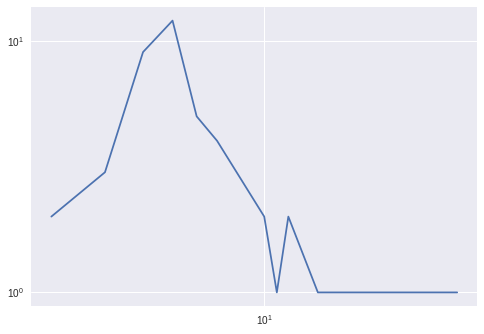

In [114]:
plt.loglog(deg1,cnt1)

In [118]:
print(len(list(nx.isolates(G2))))

0
